In [1]:
from data_preprocessing.cleaning import clean_audio_folder
from data_preprocessing.train_test_split import train_test_split_files
from data_preprocessing.merging import merge_audios_by_speakers
from data_preprocessing.splitting import split_audio_files
from data_preprocessing.spectrogram_converter import convert_audio_files_to_images

(array([ 38.,   0.,  13.,   0.,  10.,   0.,  13.,   0.,   7.,   0.,  11.,
          0.,   8.,   0.,   7.,   0.,   6.,   0.,   7.,   0.,   8.,   0.,
          9.,   0.,   9.,   0.,  12.,   0.,  26.,   0.,   0.,  79.,   0.,
        162.,   0., 260.,   0., 385.,   0., 310.,   0., 223.,   0.,  88.,
          0.,  32.,   0.,   3.,   0.,   1.,   0.,   4.,   0.,   3.,   0.,
          1.,   0.,   9.,   0., 137.]),
 array([ 1.        ,  1.48333333,  1.96666667,  2.45      ,  2.93333333,
         3.41666667,  3.9       ,  4.38333333,  4.86666667,  5.35      ,
         5.83333333,  6.31666667,  6.8       ,  7.28333333,  7.76666667,
         8.25      ,  8.73333333,  9.21666667,  9.7       , 10.18333333,
        10.66666667, 11.15      , 11.63333333, 12.11666667, 12.6       ,
        13.08333333, 13.56666667, 14.05      , 14.53333333, 15.01666667,
        15.5       , 15.98333333, 16.46666667, 16.95      , 17.43333333,
        17.91666667, 18.4       , 18.88333333, 19.36666667, 19.85      ,
      

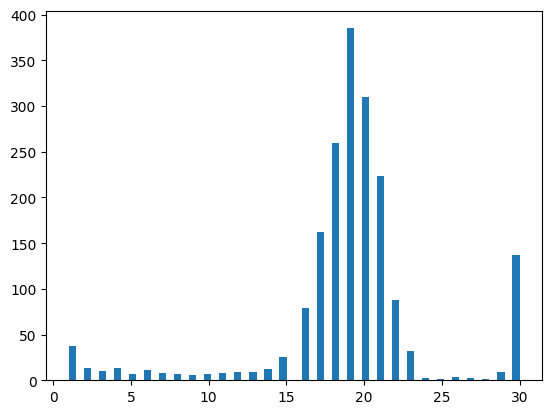

In [3]:
import glob
from typing import Dict, List

from matplotlib import pyplot as plt


files = glob.glob("../data/tsrc/train/**/*_nohash_0.wav", recursive=True)
speaker_id_to_files: Dict[str, List[str]] = {}

for file in files:
    speaker_id = file.split("\\")[-1].split("_")[-3]
    if speaker_id not in speaker_id_to_files:
        speaker_id_to_files[speaker_id] = []
    speaker_id_to_files[speaker_id].append(file)


file_occurances = [len(files) for files in speaker_id_to_files.values()]
plt.hist(file_occurances, bins=60)

In [3]:
train_test_split_files(
    '../data/tsrc/train', 
    '../data/tsrc_train_test/train', 
    '../data/tsrc_train_test/test', 
    '../data/tsrc_train_test/validation'
)

clean_audio_folder('../data/tsrc_train_test', '../data/tsrc_cleaned')
merge_audios_by_speakers('../data/tsrc_cleaned', '../data/tsrc_merged')
split_audio_files('../data/tsrc_merged', '../data/tsrc_splitted')
convert_audio_files_to_images("../data/tsrc_splitted", "../data/tsrc_sprectrograms")

Merging audio files by speaker for train data...


100%|██████████| 778/778 [00:49<00:00, 15.67it/s]


Merging audio files by speaker for test data...


100%|██████████| 43/43 [00:00<00:00, 71.73it/s]


Merging audio files by speaker for validation data...


100%|██████████| 40/40 [00:00<00:00, 77.44it/s]


Splitting audio files for train data...


100%|██████████| 778/778 [00:07<00:00, 104.20it/s]


Splitting audio files for test data...


100%|██████████| 43/43 [00:00<00:00, 232.75it/s]


Splitting audio files for validation data...


100%|██████████| 40/40 [00:00<00:00, 240.09it/s]


Converting audio files to images for train data...


100%|██████████| 4798/4798 [07:43<00:00, 10.35it/s]


Converting audio files to images for test data...


100%|██████████| 42/42 [00:04<00:00,  9.98it/s]


Converting audio files to images for validation data...


100%|██████████| 39/39 [00:03<00:00, 10.44it/s]
